Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# SLO Twitter Data Analysis  - Character Count Statistics

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides character counts for all the Tweets associated with a given company.  We visualize this statistic by plotting a relative frequency histogram of those counts for the CSV dataset.<br>

</span>

Character Count Statistics of Tweet Text by Associated Company: 
Character Count Relative Frequency Histogram: 


<Figure size 432x288 with 0 Axes>

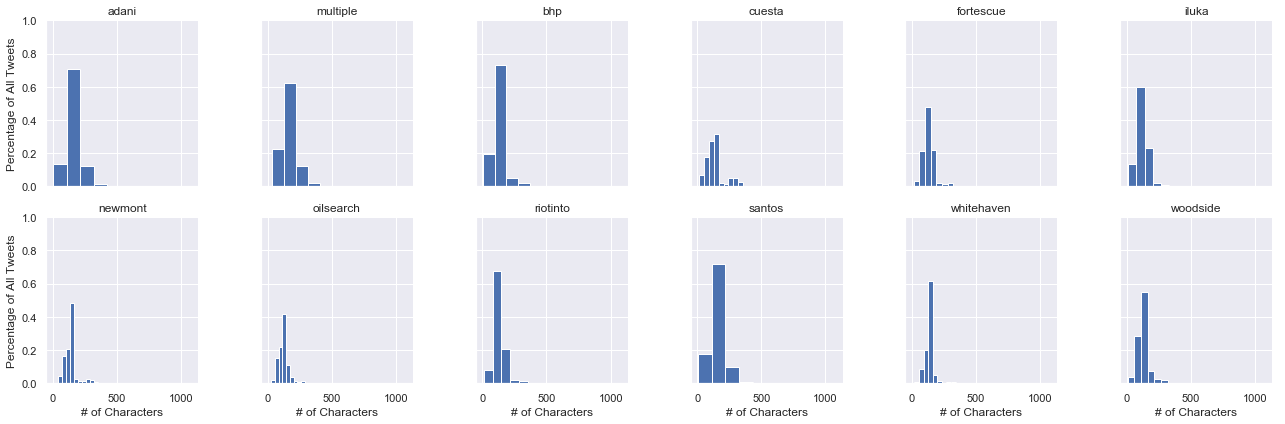

In [2]:
    print("Character Count Statistics of Tweet Text by Associated Company: ")
    print("Character Count Relative Frequency Histogram: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['text_derived', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util_v2.relhist_proc, 'text_derived', bins=10, proc=tweet_util_v2.char_len)
    grid.set_titles('{col_name}')
    grid.set_xlabels("# of Characters").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We call out data analysis function and pass in the CSV dataset imported into a Pandas dataframe per usual.<br>

</span>

Character Count Statistics of User Description Text by Associated Company: 
Character Count Relative Frequency Histogram: 


<Figure size 432x288 with 0 Axes>

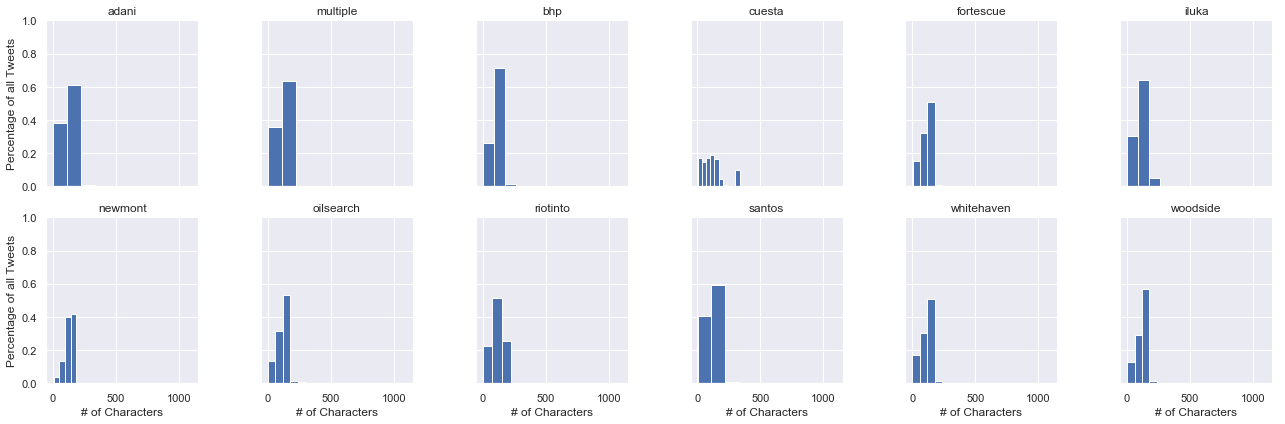

In [3]:
    print("Character Count Statistics of User Description Text by Associated Company: ")
    print("Character Count Relative Frequency Histogram: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['user_description', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util_v2.relhist_proc, 'user_description', bins=10, proc=tweet_util_v2.char_len)
    grid.set_titles('{col_name}')
    grid.set_xlabels("# of Characters").set_ylabels("Percentage of all Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

The graph outputs appear to show that most Tweets for any given company are relatively long in length.<br>

TODO - see if foreign (non-English) Tweets are responsible for extremely long Tweets due to encoding isdsues.<br>

</span>

In [5]:
    character_length = 140
    print(f"The total number of Tweets in the dataset is: {tweet_dataframe.shape[0]}")

    long_tweets = tweet_dataframe.loc[tweet_dataframe["tweet_text_length_derived"] > character_length]
    print(f"The number of Tweets over {character_length} characters is {long_tweets.shape[0]}")

    long_description = tweet_dataframe.loc[tweet_dataframe["user_description_text_length"] > character_length]
    print(f"The number of user descriptions over {character_length} characters is {long_description.shape[0]}")

The total number of Tweets in the dataset is: 670426
The number of Tweets over 140 characters is 375104
The number of user descriptions over 140 characters is 256373


<span style="font-family:Papyrus; font-size:1.25em;">
    
**TODO: refactor into function in data analysis file**

</span>